# Titanic Dataset

## Overview

This project will analyse the Titanic data set and try to find factors which increase the chance to survive the sinking of the ship. First, we start with an exploration of the data. In the following, we define a metric for the survival chance and present and discuss the results.

## Table of contents

* [Exploration](#Exploring-the-data)
* [Analysis](#Analysis:-Chance-to-survive)
* [Results](#Results)
* [Conclusion](#Conclusion)



## Exploring the data

First, the data is loaded and some basic information is printed to get an idea about the data set. Also took some insight from https://www.kaggle.com/c/titanic/data.

In [1]:
import numpy as np
import pandas as pd
#import csv

data = pd.read_csv("titanic-data.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.describe()   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


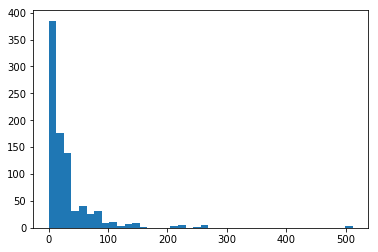

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data["Fare"], bins=40)
print()

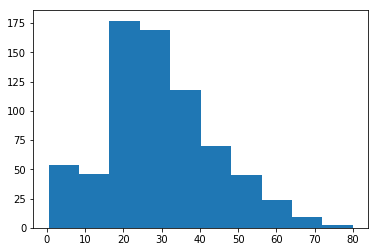

In [4]:
# The "Age" column is not missing for some of the passengers. 
# We need to exclude those to print a histogram.
plt.hist(data["Age"][data["Age"].notnull()])
print()

To get an idea if the age of a passenger had some relation with his or her chance to survive, we add a new "AgeClass" column.

In [5]:
import math

def classify_age(age):
    if age and not math.isnan(age): 
        # Use integer division.
        return int(age) // 10
    else:
        return -1  # instead of NaN
    
data["AgeClass"] = data["Age"].apply(classify_age)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


## Analysis: Chance to survive 

In the following we will analyse the Titanic dataset to find factors which increased the chance to survive the tragedy and those which did not have an effect.

Therefore I define the "chance of survival" as the probability of survival, i.e. the share of survivors in the population or a subgroup thereof:

$$ P_{survive}(group) = \frac{\textrm{number of survivors in } group}{\textrm{total number of persons}}$$


In [6]:
population_size = len(data)
num_survived = len(data[data["Survived"] == 1])
p_survival = num_survived / population_size
print("{} of {} survived, this corresponds to a survival chance of {:.3}"
     .format(num_survived, population_size, p_survival))

342 of 891 survived, this corresponds to a survival chance of 0.384



In the titanic dataset, over the whole population the chance to survive is $P_{survive}(total)=0.384$.

Lets compare  how different factors influence this chance. First, we define a function that calculates the probability to survive over groups defined by a factor.

In [7]:
def compute_survival_probabilty(criterion):
    grouped = data.groupby(criterion)
    return grouped.sum()["Survived"] / grouped.size()

Furthermore, we define a function to print the probability for each factor and create a bar plot.

In [8]:
def show_probability_for_criterion(criterion):
    
    def get_range_from_group_index(keys):
        if not type(keys[0]) == str:
            start = min(keys)
            end = max(keys) + 1
            return np.arange(start, end)
        return np.arange(len(keys))
    
    title = "Survival rate by {}".format(criterion)
    pp = compute_survival_probabilty(criterion)
    #print(title)
    #print(pp)
    keys = list(data.groupby(criterion).groups.keys())
    x = get_range_from_group_index(keys)
    %matplotlib inline
    plt.bar(x, pp)
    plt.xticks(x, keys)
    plt.title(title)
    plt.xlabel(criterion)
    plt.ylabel(r"$P_{survive}$")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    

## Results

In the following, the data is grouped by sex, ticket class and the port of embarkation and the respective chance to survive is shown.

### Sex

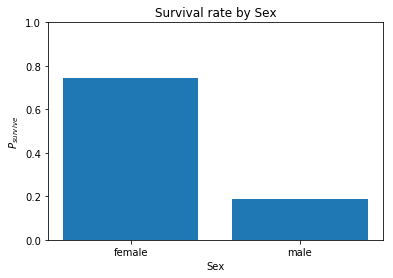

In [9]:
show_probability_for_criterion("Sex")

The gender seems to have by far the largest effect on the survival rate. Women have a much better chance to have survived the sinking of the ship. This is probably due to the "women and children first" protocol and the fact that the crew of the Titanic was not used to the rescue procedure and too few passengers boarded the rescue vessels, a consequence is that less men were able to get a spot in one of the life-saving vessels.

### Ticket class

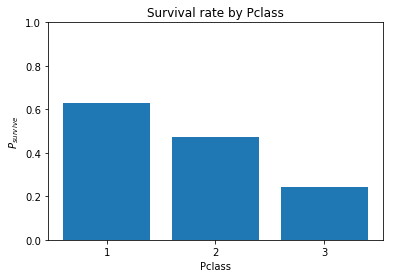

In [10]:
show_probability_for_criterion("Pclass")

The ticket class has an effect on the survival rate, too. Passengers from the first class survived the incident about twice as often as those from the third class, which have the lowest survival rate of all.

### Age

As described above, the age of passengers has been categorized into slots of 10 years each. The value "-1" represents all passengers where the age is unknown.

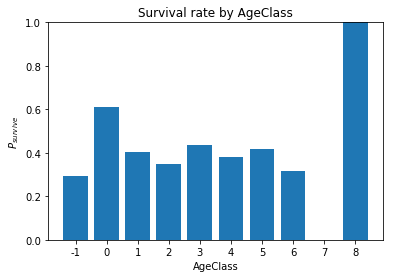

In [11]:
show_probability_for_criterion("AgeClass")

The survival rate is 100.0 for people above 80 and 0.0 for people between 70 and 79. This "definite" numbers are due to the small number of individuals in these groups:

In [12]:
data.groupby("AgeClass").size()

AgeClass
-1    177
 0     62
 1    102
 2    220
 3    167
 4     89
 5     48
 6     19
 7      6
 8      1
dtype: int64

Besides these, the figures show that the survival rate for children below the age of 10 was better than average, and that for people with unknown age is worst.

The former observation can be explained by the "women and children first" protocol. The latter may be related to the passenger class distribution of this group. I guess there are more third class passengers within this group, but this shall not be part of this investigation.

For all other age groups, the survival rate is more or less in average.

### Port of embarkation

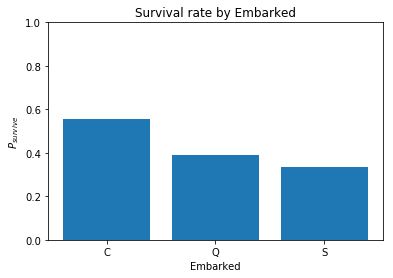

In [13]:
show_probability_for_criterion("Embarked")

The embarkation port seems to have an effect, too. Passengers embarked in Cherbourgh had a higher chance to survive than the average, and about 66% more of these passengers survived than of the passengers which embarked at Southampton. While this is unexpected at first, there might be a relation between the port and the other class. From what I know, Southampton used to be a large port for common people migrating to the U.S. and maybe the first tour of the Titanic attracted many upperclass French to join its trip in Cherbourgh. 

Indeed, a look into the following figures show this relation:

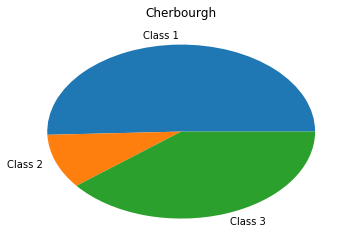

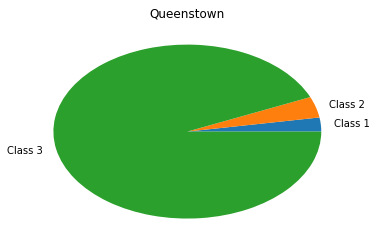

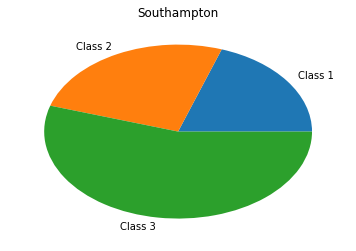

In [14]:
def portname(p):
    if p == "C":
        return "Cherbourgh"
    elif p == "Q":
        return "Queenstown"
    else:
        return "Southampton"
    
    
def passenger_class(p):
    return "Class {}".format(p) 


port_and_class = data.groupby("Pclass").apply(lambda x: x.groupby("Embarked").size())
total_embarked = port_and_class.sum()
port_and_class_shares = port_and_class.div(total_embarked)
for key in port_and_class_shares:
    plt.figure()
    plt.pie(port_and_class_shares[key], labels=port_and_class_shares[key].keys().map(passenger_class))
    plt.title(portname(key))

The share of first class passengers is much higher for those embarking at Cherbourgh than for the other ports. Thus, there port of embarkation and the ticket class are ticket class dependent. This explains why passengers from Cherbourgh had a higher survival rate. 

It would be interesting to find out which of these two factors really caused a higher survival chance. I doubt that the port has an "causation effect". But thinking about a proper A/B test setup goes beyond the scope of this project, I guess.

#### Survival per port and class
Just some fiddling with Pandas:

In [15]:
grouped_survival = data.groupby("Embarked").apply(lambda x: x.groupby("Pclass").agg(["sum", "count"]))["Survived"]
grouped_survival["share"] = grouped_survival["sum"] / grouped_survival["count"]
grouped_survival.rename({"sum": "survived", "count": "total"}, inplace=True)
grouped_survival

sum  count     share
Embarked Pclass                      
C        1        59     85  0.694118
         2         9     17  0.529412
         3        25     66  0.378788
Q        1         1      2  0.500000
         2         2      3  0.666667
         3        27     72  0.375000
S        1        74    127  0.582677
         2        76    164  0.463415
         3        67    353  0.189802

Interestingly, the survival rate for people embarking in Queenstown is higher than for Southampton, allthough the share of 3rd class passengers is higher. 

## Conclusion

We have investigated the relation between different factors and the chance to survive the sinking of the Titanic. We have shown that sex, ticket class, the age  and the port of embarkation are correlated to the survival rate. The figures indicate a correlation between ticket class and port of embarkation. Further investigation on that is not part of this project.

## Sources

* [Pandas documentation, e.g. on groupby()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)
* [Matplotlib documentation, e.g. on pie charts](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pie.html)
* [Wikipedia: RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic)
* [stackoverflow, e.g. "How can I add a table of contents to an ipython notebook?"](https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-an-ipython-notebook) 